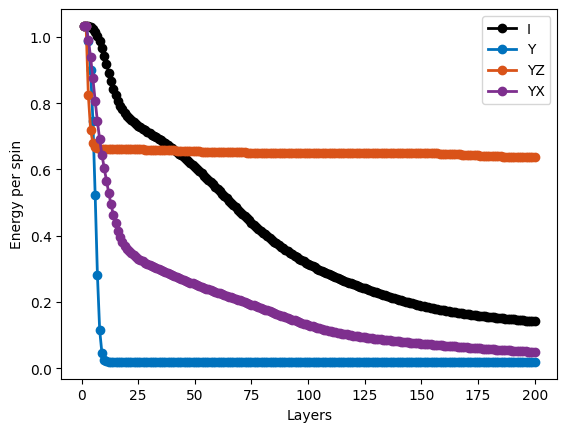

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.sparse import eye as speye
import nbimporter
from CDFQA_class import CDFQA

# Initialize the CDFQA object
cdfqa = CDFQA()

# Initialization
N = 6
J = np.complex128(-1)  # Ensure J is complex
hz = np.complex128(-0.4)  # Complex value for hz
hx = np.complex128(-0.4)  # Complex value for hx
perBC = 1  # Periodic boundary conditions
CD = ['k', "#0072BD", "#D95319", "#7E2F8E", 'g', 'c', 'y']
FalqonCD = 0  # 0 for original FALQON
Colorcount = 2
alpha = 1
beta = 1
gamma = 1

# Building the Hamiltonians as complex matrices
HP = (cdfqa.ham_nn(N, 3, 3, J, perBC).astype(np.complex128) + 
      cdfqa.ham_onsite(N, 3, hz).astype(np.complex128) + 
      cdfqa.ham_onsite(N, 1, hx).astype(np.complex128))

# Eigen decomposition (equivalent to eig in MATLAB)
D, EV = eigh(HP)



# Define other Hamiltonians (ensuring they are complex)
HM = cdfqa.ham_onsite(N, 1, 1).astype(np.complex128)  # Ensure HM is complex
HCD0 = speye(2**N, dtype=np.complex128)  # Sparse identity matrix as complex
HCD = cdfqa.ham_onsite(N, 2, 1).astype(np.complex128)  # Ensure HCD is complex
HCD1 = cdfqa.ham_nn(N, 2, 3, 1, perBC).astype(np.complex128)  # Ensure HCD1 is complex
HCD2 = cdfqa.ham_nn(N, 2, 1, 1, perBC).astype(np.complex128)  # Ensure HCD2 is complex

# Initial state (normalized vector) as complex
psi_initial = np.ones(2**N, dtype=np.complex128) / np.sqrt(2**N)

# Circuit parameters
Layers = 200
dt = 0.01

# Running the energy vs circuit depth calculations
EN0, B0, G0 = cdfqa.cdfqa_energy_vs_cir_depth(N, HP, HM, HCD0, psi_initial, Layers, dt)
EN, B, G = cdfqa.cdfqa_energy_vs_cir_depth(N, HP, HM, HCD, psi_initial, Layers, dt)
EN1, B1, G1 = cdfqa.cdfqa_energy_vs_cir_depth(N, HP, HM, HCD1, psi_initial, Layers, dt)
EN2, B2, G2 = cdfqa.cdfqa_energy_vs_cir_depth(N, HP, HM, HCD2, psi_initial, Layers, dt)

# Plotting the results
plt.plot(range(1, Layers + 1), (np.real(EN0) - D[0]) / N, '-o', color=CD[FalqonCD], linewidth=2, label='EN0')
plt.plot(range(1, Layers + 1), (np.real(EN) - D[0]) / N, '-o', color=CD[FalqonCD + 1], linewidth=2, label='EN')
plt.plot(range(1, Layers + 1), (np.real(EN1) - D[0]) / N, '-o', color=CD[FalqonCD + 2], linewidth=2, label='EN1')
plt.plot(range(1, Layers + 1), (np.real(EN2) - D[0]) / N, '-o', color=CD[FalqonCD + 3], linewidth=2, label='EN2')

# Show the plot
plt.legend(['I', 'Y', 'YZ', 'YX'])
plt.xlabel('Layers')
plt.ylabel('Energy per spin')
plt.show()
